In [14]:
import numpy as np
import tensorflow as tf


In [15]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(y_pred))

[[0.13361934]
 [0.99996436]
 [0.00212464]
 [0.0017552 ]
 [0.971019  ]
 [0.08417981]
 [0.9392672 ]
 [0.9674846 ]
 [0.9325501 ]
 [0.74627805]]


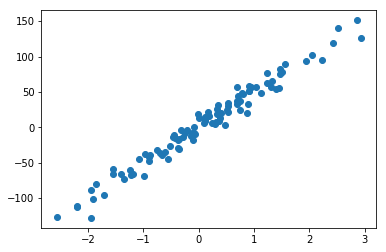

In [49]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_features=1, noise=10)
plt.scatter(X, y)
X_train = np.hstack((np.ones((X.shape[0], 1)), X))

In [52]:
n_features = 1
n_samples = X_train.shape[0]
X_inp = tf.placeholder(dtype=tf.float32, shape=(n_samples, 2))
weights = tf.Variable(tf.random_normal((1, 2)))
y_pred = tf.matmul(weights, tf.transpose(X_inp))
init = tf.global_variables_initializer()    

In [54]:
with tf.Session() as sess:
    sess.run(init)
    res = sess.run(y_pred, feed_dict={X_inp: X_train})
    print(res)

[[ 0.09592479  0.12093362  0.12509772 -0.9188811  -0.44760588 -0.00446111
  -0.00816494  0.6437078  -0.00666279 -0.18807733 -0.07643482 -0.5452506
  -0.9342407  -0.70132697 -0.59254813 -0.26681036 -0.20812818 -0.62566835
  -0.02232212 -0.18599504 -0.0589482  -0.52933866 -0.5957675  -0.48415312
  -0.24499878 -1.017307   -0.19446728 -0.76073086 -1.1313429  -0.05905153
   0.16658184 -0.1700532  -0.30095428  0.17404306 -0.01450482 -0.90213233
  -0.5877538  -0.22804046  0.00169399 -0.12886097 -0.264571    0.4821456
  -0.3263604  -0.33477253 -0.30807996  0.1710808  -0.6850959  -0.7397281
   0.06164315  0.51246107 -0.36946136  0.20224226 -0.7029417  -0.20169535
   0.6206565   0.3612665   0.09631053 -0.44379485 -0.26643112 -0.6184015
  -0.3404581  -0.51704514 -0.80551386 -0.41912615 -0.40473545 -0.07197879
  -0.13113901 -0.34864175 -0.5026947  -0.85630465 -0.80501235 -0.6527083
  -0.33098873 -0.08172549 -0.42233098  0.41643637 -0.1778085   0.3268972
  -0.24678606 -0.1381802  -0.05166909 -0.134

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`